## 서울시 따릉이 대여 수요 분석

* id 고유 id

* hour 시간

* temperature 기온

* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)

* humidity 습도

* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

* ozone 오존

* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

* count 시간에 따른 따릉이 대여 수


* 따릉이는 서울특별시에서 2014년부터 시범 운영을 시작하고 2015년 10월부터 본격적으로 정식 운영을 시행한 완전 무인 공공자전거 대여 서비스이다.
* 대중교통 이후의 환승으로 따릉이 사용이 가능하다.

## 분석 
1. 퇴근시 대중교통 이후에 따릉이 사용의 빈도 파악

2. 퇴근 이후 한강 등 산책의 용도로 사용 빈도

3. 온도에 따른 수요 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 그래프 한글 폰트
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
train.describe()
# 평균 / 중앙값에 대한 판단 > 이상치를 보고 판단

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


* 데이터 클랜징

In [7]:
# 결측값 확인
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [8]:
# hour_bef_temperature의 Nan 값 확인 > 삭제
train[train['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
train = train.dropna(subset = ['hour_bef_temperature'])

In [10]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [11]:
train[train['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [12]:
train2 = train.dropna(subset = ['hour_bef_windspeed'])

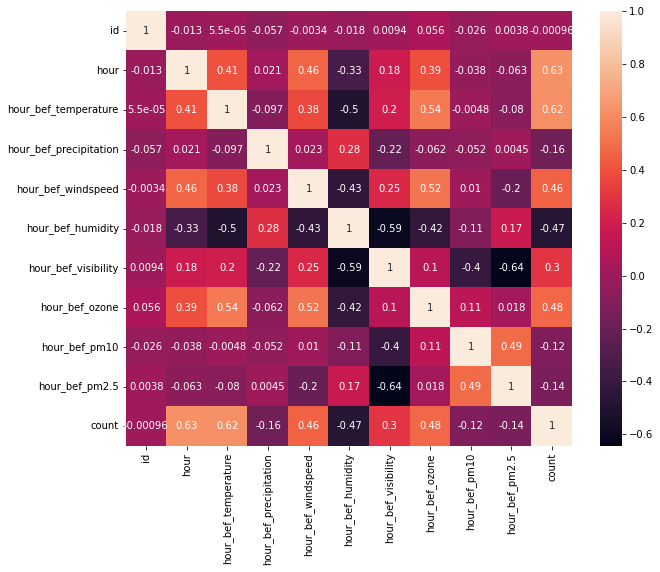

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(train2.corr(), annot = True)
plt.show()

hour_bef_windspeed과 관련있는 컬럼 : hour / ozone

In [14]:
train2.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [15]:
train_windspeed_null = train[train.hour_bef_windspeed.isnull()]
train_windspeed_null

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [16]:
train_hour_0 = train_windspeed_null[train_windspeed_null.hour == 0]
train_hour_1 = train_windspeed_null[train_windspeed_null.hour == 1]
train_hour_2 = train_windspeed_null[train_windspeed_null.hour == 2]
train_hour_3 = train_windspeed_null[train_windspeed_null.hour == 3]
train_hour_12 = train_windspeed_null[train_windspeed_null.hour == 12]
train_hour_13 = train_windspeed_null[train_windspeed_null.hour == 13]
train_hour_20 = train_windspeed_null[train_windspeed_null.hour == 20]

In [17]:
train_hour_0 = train_hour_0.fillna(value = '2.0')
train_hour_1 = train_hour_1.fillna(value = '1.8')
train_hour_2 = train_hour_2.fillna(value = '1.6')
train_hour_3 = train_hour_3.fillna(value = '1.6')
train_hour_12 = train_hour_12.fillna(value = '2.8')
train_hour_13 = train_hour_13.fillna(value = '3.3')
train_hour_20 = train_hour_20.fillna(value = '3.3')

In [18]:
train_drop_na = train.dropna(subset = ['hour_bef_windspeed'])

In [19]:
train_concat = pd.concat([train_drop_na, train_hour_0,train_hour_1,train_hour_2,train_hour_3,train_hour_12,train_hour_13,train_hour_20])
train = train_concat
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 780
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1457 non-null   int64  
 1   hour                    1457 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1457 non-null   object 
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1384 non-null   object 
 8   hour_bef_pm10           1370 non-null   object 
 9   hour_bef_pm2.5          1343 non-null   object 
 10  count                   1457 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 136.6+ KB


In [20]:
train['hour_bef_windspeed'] = train['hour_bef_windspeed'].astype(float)

In [21]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             73
hour_bef_pm10              87
hour_bef_pm2.5            114
count                       0
dtype: int64

In [22]:
# 결측치 평균으로 채우기
train['hour_bef_ozone'] = train['hour_bef_ozone'].astype(float)
train['hour_bef_ozone'] = train['hour_bef_ozone'].fillna(train['hour_bef_ozone'].mean())

train['hour_bef_pm10'] = train['hour_bef_pm10'].astype(float)
train['hour_bef_pm10'] = train['hour_bef_pm10'].fillna(train['hour_bef_pm10'].mean())

train['hour_bef_pm2.5'] = train['hour_bef_pm2.5'].astype(float)
train['hour_bef_pm2.5'] = train['hour_bef_pm2.5'].fillna(train['hour_bef_pm2.5'].mean())


In [23]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

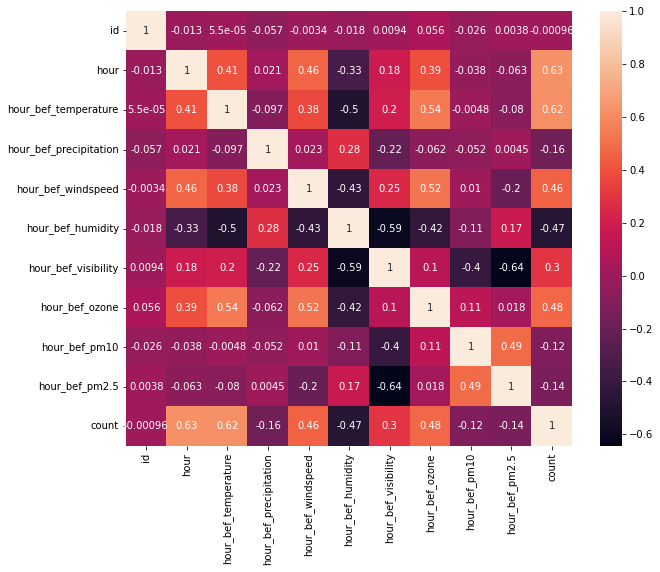

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(train2.corr(), annot = True)
plt.show()

## 상관분석 결과
- 시간과 온도 햇빛의 유무 양의 상관관계
- 온도와 습도에 대한 음의 상관관계
- 시간에 대한 오존 = 햇빛
- 온도/오존과 풍속의 관계
- 습도 가시성의 관계
- 습도와 오존에 대한 음의 상관관계
- 미세먼지와 가시성과의 관계




#### 상관분석 결과에 따른 추측
1. 따릉이를 타는 시간은 출퇴근 시간에 수요가 많을 것이다.
2. 날씨가 너무 덥거나, 추운시간에는 수요가 적을 것이다.
3. 비가 오는 날(습도가 높은날)에는 수요가 적을 것이다.
4. 온도가 높은 날에는 오존이 높으며, 풍속도 빠를 것이다.
5. 습도가 높은 날에는 가시성이 낮을 것이며, 이에 따라 수요가 적을 것이다.
6. 미세먼지가 높은 날에는 수요가 적을 것이다.


In [25]:
# 그래프 유틸 함수
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45):
    plt.rc('font', family = 'NanumGothic')
    plot = df.plot(kind='bar', figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

# plot_bar(num_screening_rat, 'screening_rat', 'box_off_num', 'num_screening_rat')

1. 시간에 대한 수요

- 18, 19, 17, 21, 20시 순 : 퇴근 및 저녁에 수요가 많다는 것을 확인 할 수 있다.

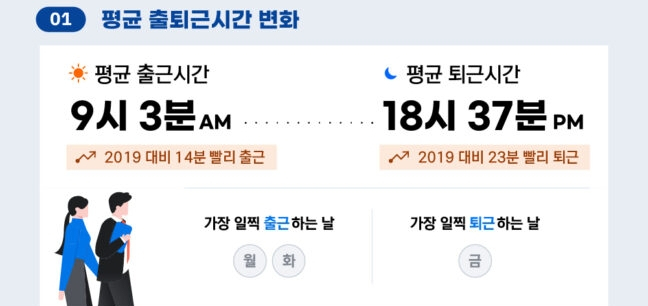

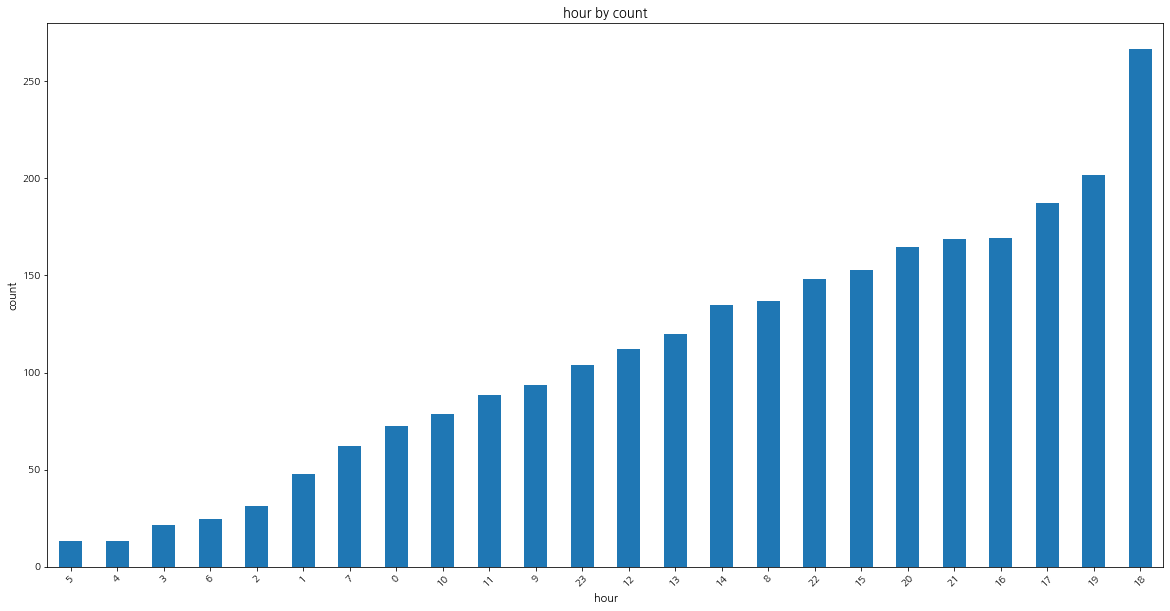

In [26]:
# 따릉이 시간에 대한 수요
hour_count = train.groupby('hour').mean()['count'].sort_values()
hour_count

plot_bar(hour_count, 'hour', 'count', 'hour by count')

2. 온도에 대한 수요
- 높은 온도에서 수요가 많은 것을 볼 수 있다. 이는 더울수록 사람들은 걷는 것보다 자전거를 타고 빠르게 거리를 이동하는 것을 선호한다고 파악할 수 있다.

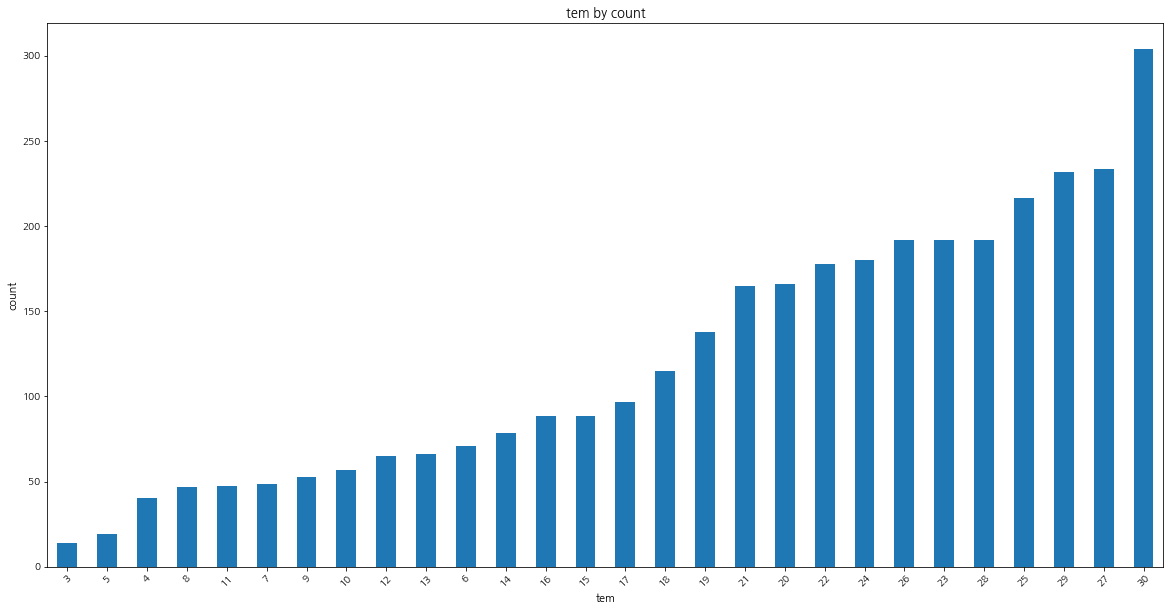

In [27]:
# 따릉이 온도에 대한 수요
train['hour_bef_temperature'] = train['hour_bef_temperature'].astype(int)
tem_count = train.groupby('hour_bef_temperature').mean()['count'].sort_values()
tem_count

plot_bar(tem_count, 'tem', 'count', 'tem by count')

3. 비와 습도의 관계
- 비가 오는 경우 습도는 40 ~ 100의 사이이며, 비가오지 않는 경우에는 0~100의 범위를 가진다.

- 전체적인 수요는 비가 안올때 많으며, 비가 오는 경우에는 적은 것을 볼 수 있다.
(비가 오는 경우 : 33, 비가 오지 않는 경우 111)

- 비가오지 않는 경우에는 습도가 올라갈수록 수요가 작이지며, 비가 오는 경우에는 습도가 올라갈수록 수요가 증가하는 모습을 볼 수 있다.

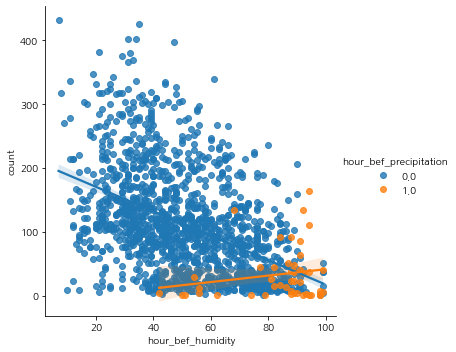

In [28]:
# 비와 습도의 상관관계
sns.lmplot(x="hour_bef_humidity", y="count", hue = "hour_bef_precipitation", data=train)
plt.show()

In [29]:
rain_count = train.groupby('hour_bef_precipitation').mean()['count'].sort_values()
rain_count

hour_bef_precipitation
1.0     33.673913
0.0    111.130404
Name: count, dtype: float64

4. 온도와 오존/풍속과의 관계

- 온도와 오존은 양의 상관관계

- 온도와 풍속은 양의 상관관계

- 오존과 풍속은 양의 상관관계

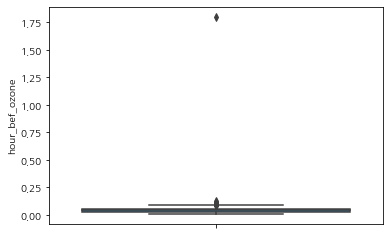

In [30]:
# 이상치 제거
sns.boxplot(data = train, y = 'hour_bef_ozone')

In [31]:
train['hour_bef_ozone'].sort_values()

313     0.003
259     0.003
817     0.003
968     0.003
828     0.004
        ...  
118     0.100
292     0.106
1430    0.112
1427    0.125
244     1.800
Name: hour_bef_ozone, Length: 1457, dtype: float64

In [32]:
train = train.drop(244, axis = 0)

In [33]:
train['hour_bef_ozone'].sort_values()

817     0.003
259     0.003
968     0.003
313     0.003
1358    0.004
        ...  
118     0.100
641     0.100
292     0.106
1430    0.112
1427    0.125
Name: hour_bef_ozone, Length: 1456, dtype: float64

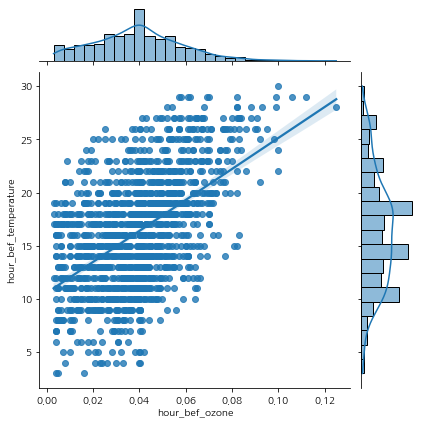

In [34]:
# 오존과 온도의 상관관계
sns.jointplot(x="hour_bef_ozone", y="hour_bef_temperature", data=train, kind = "reg")
plt.show()

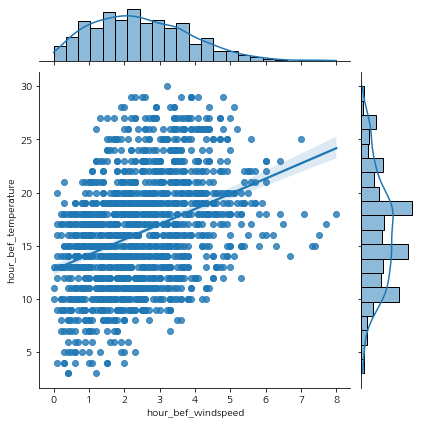

In [35]:
#  온도와 풍속의 관계
sns.jointplot(x="hour_bef_windspeed", y="hour_bef_temperature", data=train, kind = "reg")
plt.show()

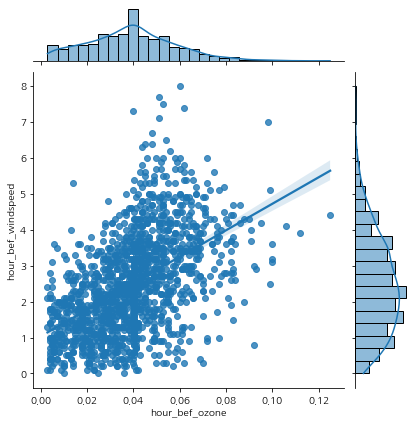

In [36]:
# 풍속과 오존의 관계
sns.jointplot(x="hour_bef_ozone", y="hour_bef_windspeed", data=train, kind = "reg")
plt.show()

5. 습도와 온도/가시성 관계와 습도에 대한 수요
- 습도와 가시성은 음의 상관관계를 가진다.

- 습도와 온도는 음의 상관관계를 가진다/

- 습도가 낮은 경우에 수요가 많다고 파악 할 수 있다. 습도가 낮을수록 가시성이 좋고, 온도가 높으며 이때 수요가 많다고 판단 할 수 있다. 

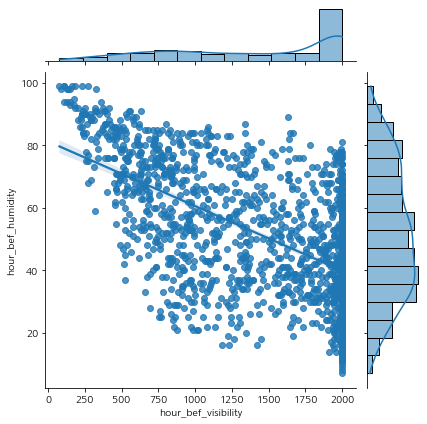

In [37]:
# 습도와 가시성에 관계
sns.jointplot(x="hour_bef_visibility", y="hour_bef_humidity", data=train, kind = "reg")
plt.show()

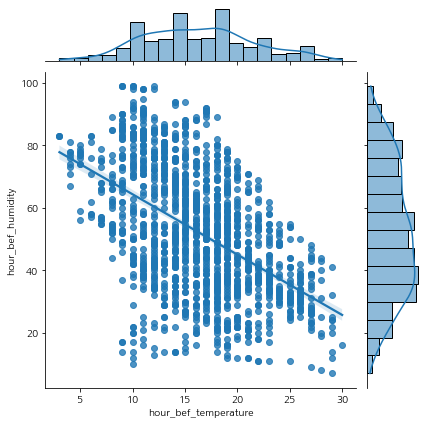

In [38]:
# 온도와 습도의 관계
sns.jointplot(x="hour_bef_temperature", y="hour_bef_humidity", data=train, kind = "reg")
plt.show()

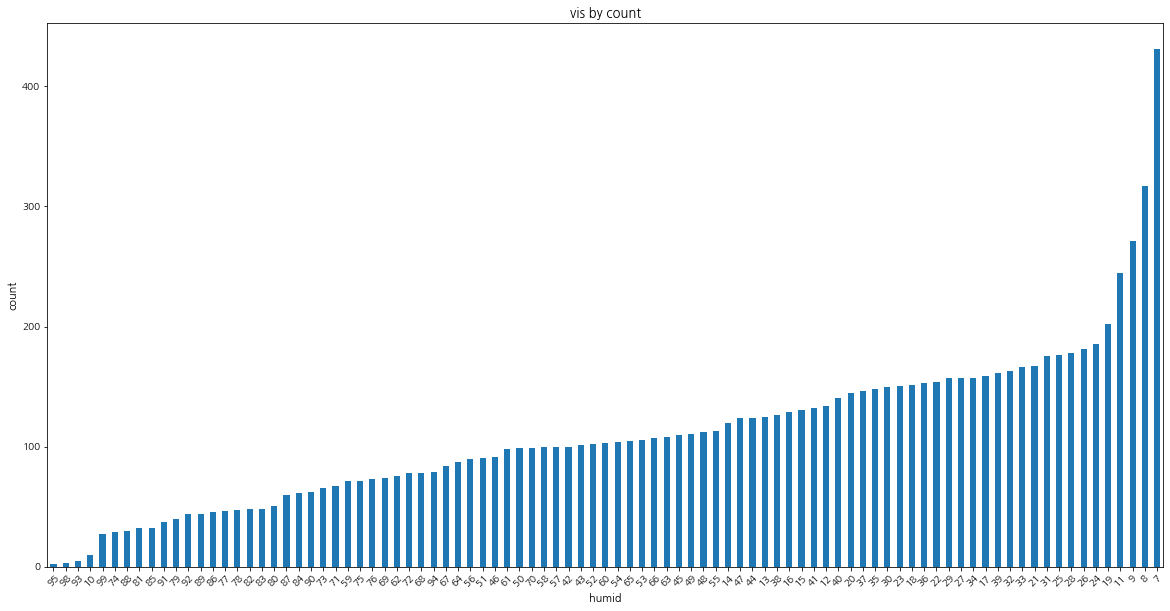

In [39]:
train['hour_bef_humidity'] = train['hour_bef_humidity'].astype(int)
humid_count = train.groupby('hour_bef_humidity').mean()['count'].sort_values()
humid_count

plot_bar(humid_count, 'humid', 'count', 'vis by count')

6. 미세먼지 농도 PM2.5 / PM10
- 도메인 :  PM10이 높고, PM2.5가 낮은 경우에는 가시거리가 높다.
- 초미세먼지(PM2.5) 주의보 


* 0 ~ 15(좋음) 
* 16 ~ 35(보통) 
* 36 ~ 75(나쁨) 
* 76 ~(매우 나쁨)


- 미세먼지(PM10) 주의보 


* 좋음 : 0~30㎍/㎥
* 보통 : 31~80㎍/㎥
* 약간 나쁨 : 81~120㎍/㎥ - 노약자들의 장시간 실외 활동 가급적 자제
* 나쁨 : 121~200㎍/㎥ - 무리한 실외 활동 자제 요청((특히 호흡기, 심질환자, 노약자)
장시간 무리한 실외 활동 자제
* 매우 나쁨 : 201~300㎍/㎥ - 실외 활동 제한, 실외 활동 자제
* 위험 : 301㎍/㎥ ~ - 실내 활동으로 제한

In [40]:
# 초미세먼지
def checkpm25(a):
  if a > 75:
    return '매우나쁨'
  elif a > 35:
    return '나쁨'
  elif a > 15:
    return '보통'
  else : 
    return '좋음'

In [41]:
train['초미세먼지'] = train['hour_bef_pm2.5'].apply(checkpm25)

In [42]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,초미세먼지
0,3,20,16,1.0,1.5,89,576.0,0.027,76.0,33.0,49.0,보통
1,6,13,20,0.0,1.4,48,916.0,0.042,73.0,40.0,159.0,나쁨
2,7,6,13,0.0,0.7,79,1382.0,0.033,32.0,19.0,26.0,보통
3,8,23,8,0.0,2.7,54,946.0,0.040,75.0,64.0,57.0,나쁨
4,9,18,29,0.0,4.8,7,2000.0,0.057,27.0,11.0,431.0,좋음


In [43]:
train.groupby('초미세먼지').count()['count']

초미세먼지
나쁨      358
매우나쁨     18
보통      964
좋음      116
Name: count, dtype: int64

* 초미세먼지

나쁨      358

매우나쁨     18

보통      964

좋음      116

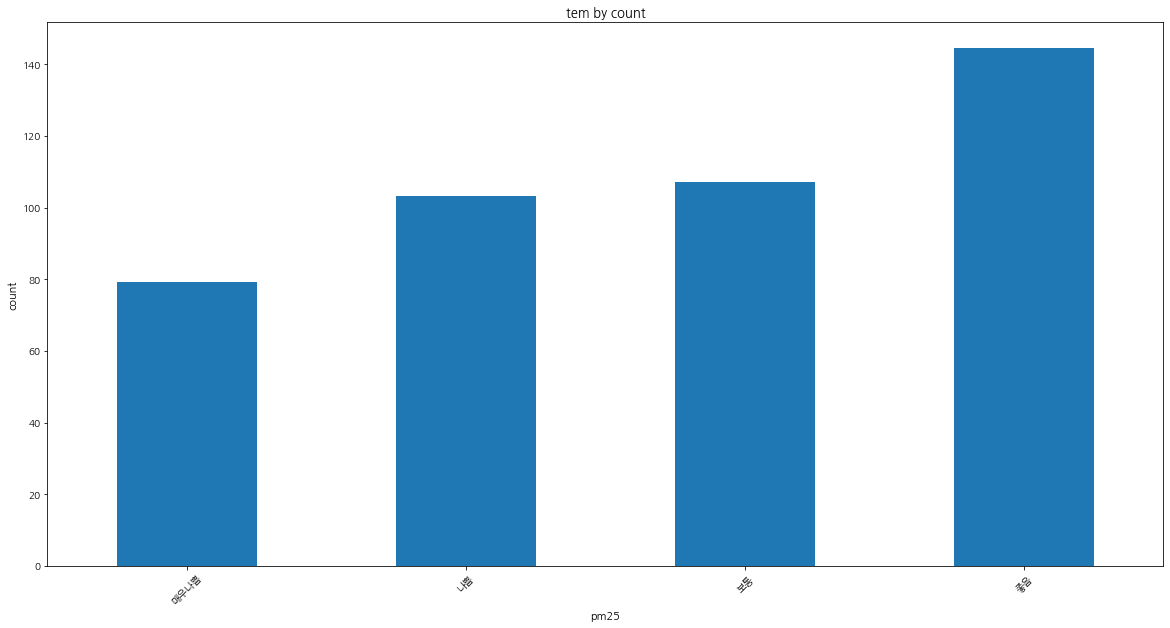

In [44]:
pm25_count = train.groupby('초미세먼지').mean()['count'].sort_values()
pm25_count

plot_bar(pm25_count, 'pm25', 'count', 'tem by count')

* 좋음이 가장 많았으며, 순서대로 보통 나쁨 매우나쁨 순서로 수요가 적었다.

In [45]:
# 미세먼지
def checkpm10(a):
  if a > 300:
    return '위험'
  elif a > 200:
    return '매우나쁨'
  elif a > 120:
    return '나쁨'
  elif a > 80:
    return '약간나쁨'
  elif a > 30:
    return '보통'
  else :
    return '좋음'

In [46]:
train['미세먼지'] = train['hour_bef_pm10'].apply(checkpm10)

In [47]:
train.groupby('미세먼지').count()['count']

미세먼지
나쁨        39
매우나쁨      13
보통      1063
약간나쁨     148
좋음       193
Name: count, dtype: int64

* 미세먼지

나쁨        39

매우나쁨      13

보통      1063

약간나쁨     148

좋음       193

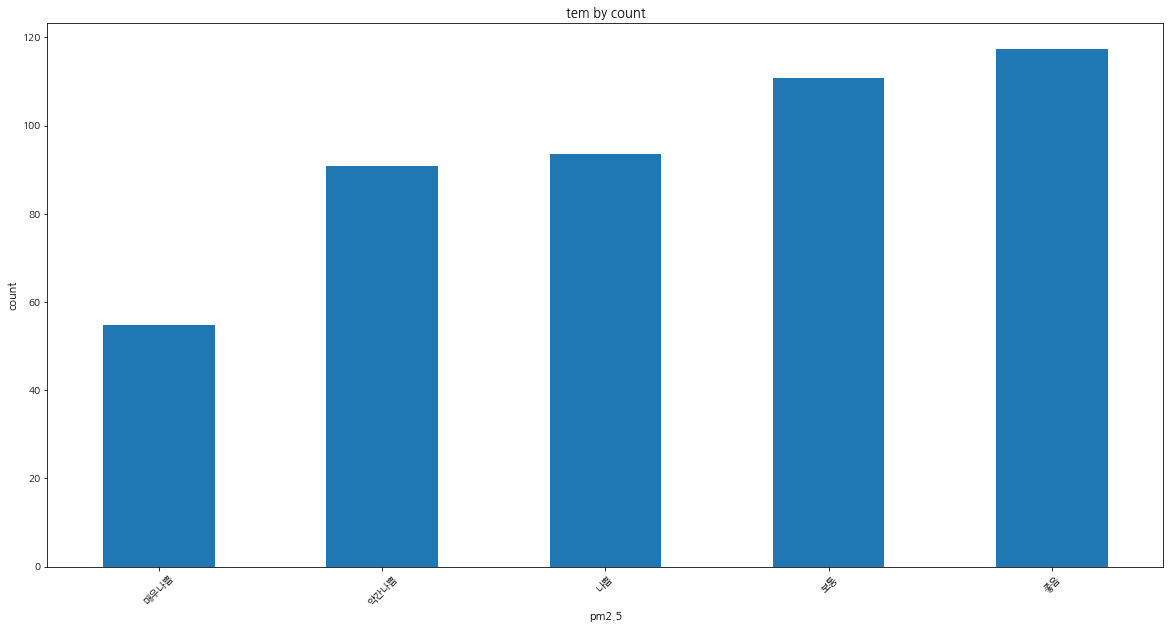

In [48]:
pm25_count = train.groupby('미세먼지').mean()['count'].sort_values()
pm25_count

plot_bar(pm25_count, 'pm2.5', 'count', 'tem by count')

* 미세먼지도 마찬가지로 좋음, 보통, 나쁨, 약간나쁨, 매우나쁨 순서로 수요가 적어졌다.

## 불쾌지수와 수요의 관계
* 불쾌지수 : 기온과 습도를 기준으로 사람들이 불쾌감을 느끼는 온도와 습도를 지수로 나타낸 것
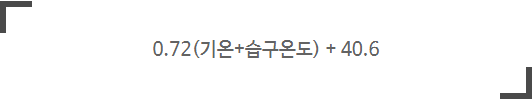
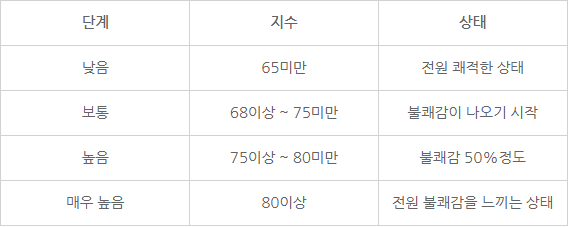


In [49]:
# 불쾌지수
def temhumid(x):
  t = x['hour_bef_temperature']
  rh = x['hour_bef_humidity']
  return 0.72*(t+rh)+40.6

In [50]:
train['불쾌지수'] = train.apply(temhumid, axis = 1)
train['불쾌지수']

0       116.20
1        89.56
2       106.84
3        85.24
4        66.52
         ...  
1229     88.12
260      86.68
1138     87.40
18       85.96
780      74.44
Name: 불쾌지수, Length: 1456, dtype: float64

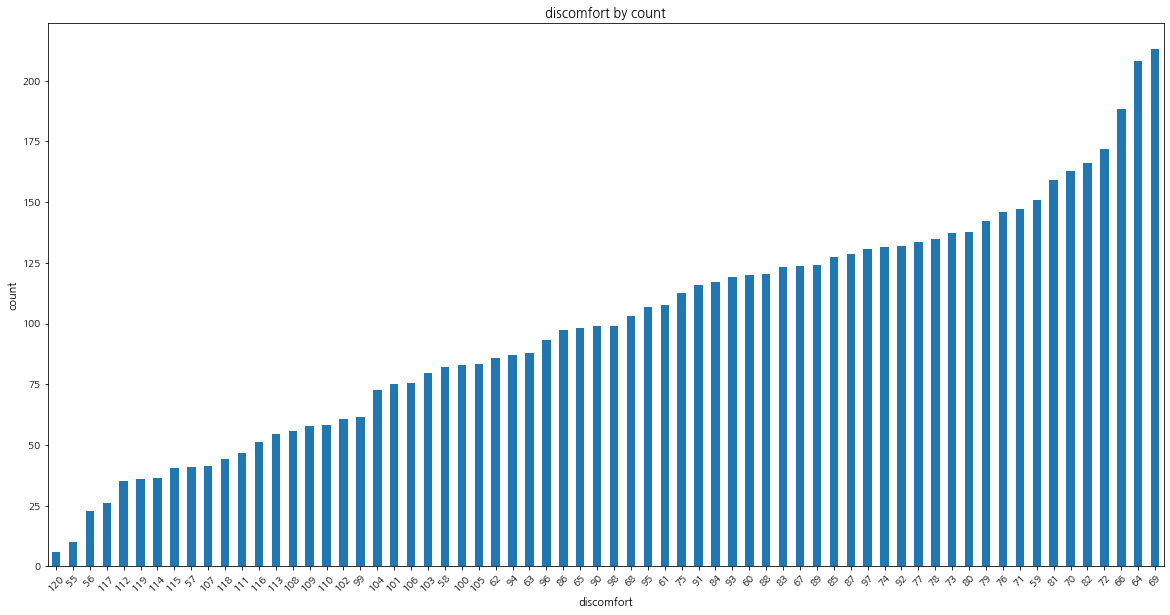

In [51]:
train['불쾌지수'] = train['불쾌지수'].astype(int)
discomfort_count = train.groupby('불쾌지수').mean()['count'].sort_values()
discomfort_count

plot_bar(discomfort_count, 'discomfort', 'count', 'discomfort by count')

* 불쾌지수가 60~70대에서 수요가 많다는 것을 판단 할 수 있다.

In [52]:
# 불쾌지수 평가
def discomfort(a):
  if a >= 80:
    return '매우높음'
  elif a >= 75:
    return '높음'
  elif a >= 68:
    return '보통'
  else : 
    return '낮음'

In [53]:
train['불쾌지수 평가'] = train['불쾌지수'].apply(discomfort)

In [54]:
discomfort_counting = train.groupby('불쾌지수 평가').count()['count']
discomfort_counting

불쾌지수 평가
낮음        63
높음       156
매우높음    1113
보통       124
Name: count, dtype: int64

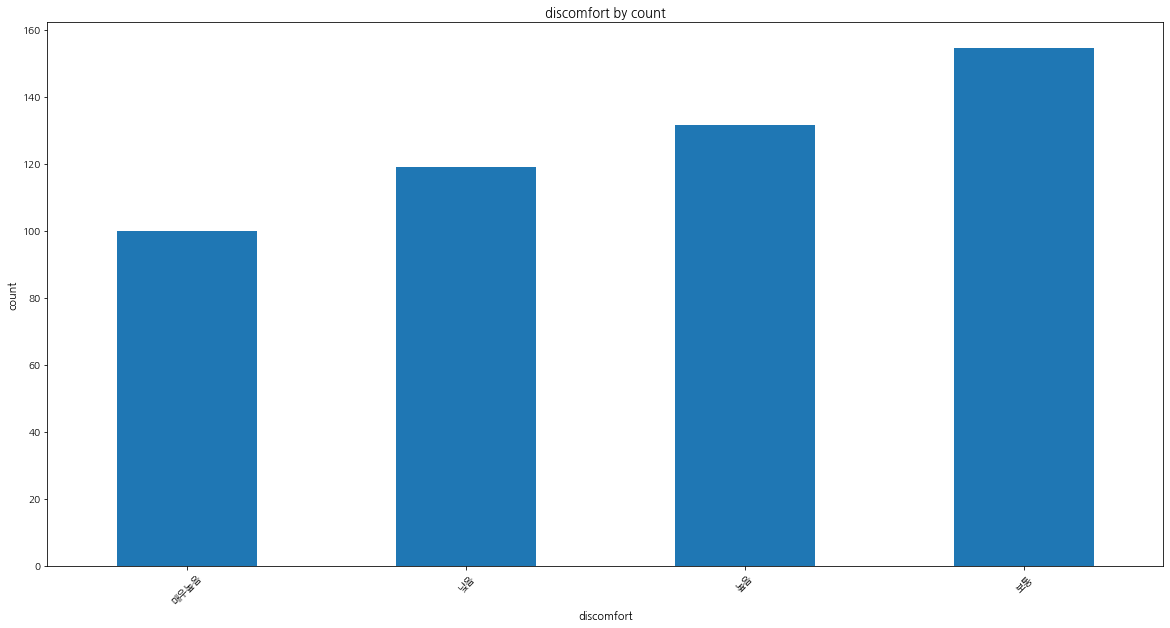

In [55]:
discomfort_count = train.groupby('불쾌지수 평가').mean()['count'].sort_values()
discomfort_count

plot_bar(discomfort_count, 'discomfort', 'count', 'discomfort by count')

In [56]:
# 불쾌지수와 온도에 대한 관계
discomfort_min = train.groupby('불쾌지수 평가').mean()['hour_bef_temperature'].sort_values()
discomfort_min

불쾌지수 평가
낮음      15.746032
매우높음    15.951482
보통      17.411290
높음      17.884615
Name: hour_bef_temperature, dtype: float64

* 보통에서 수요가 가장 많으며, 높음과 낮음 매우 낮음 순서로 수요가 감소했다.
* 낮음 = 날씨가 너무 추울 가능성도 있다.

## 체감온도에 따른 수요관계
* 체감온도 : 외부에 있는 사람이나 동물이 바람과 한기에 노출된 피부로부터 열을 빼앗길 때 느끼는 추운 정도를 나타내는 지수 

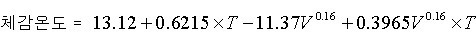


In [57]:
# 체감온도
def temwind(x):
  t = x['hour_bef_temperature']
  v = x['hour_bef_windspeed']
  return 13.12+0.6215*t-11.37*v**0.16+0.3965*v**0.16*t

In [58]:
train['체감온도'] = train.apply(temwind, axis = 1)
train['체감온도']

0       17.701132
1       21.919730
2       15.328775
3        8.481940
4       31.308659
          ...    
1229    15.547534
260     15.547534
1138    22.582953
18      23.588825
780     16.980063
Name: 체감온도, Length: 1456, dtype: float64

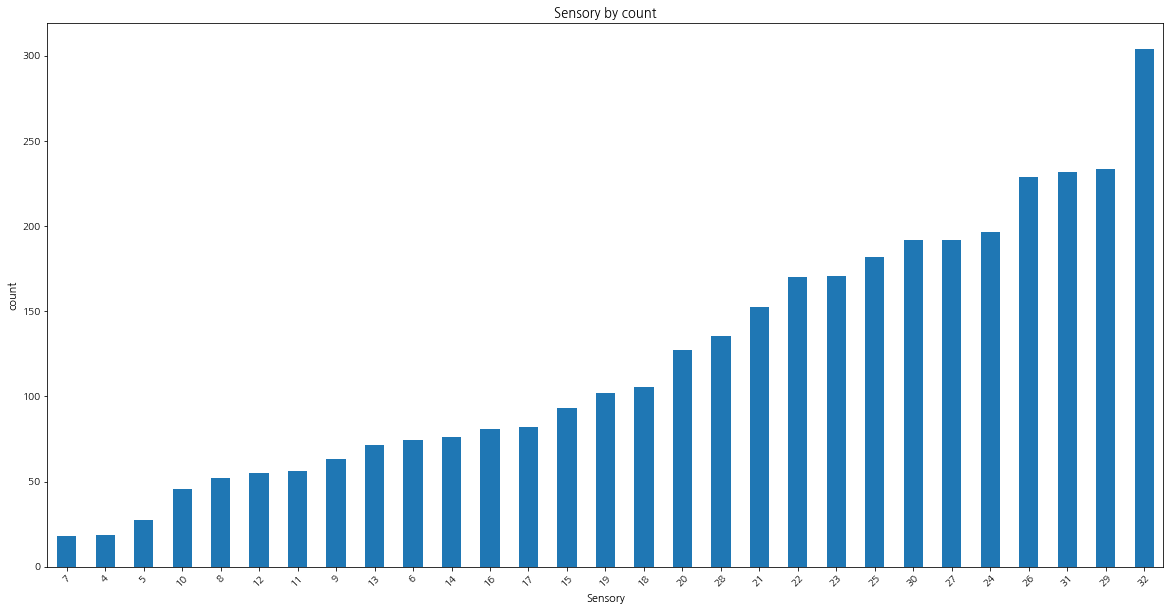

In [59]:
train['체감온도'] = train['체감온도'].astype(int)
Sensory_count = train.groupby('체감온도').mean()['count'].sort_values()
Sensory_count

plot_bar(Sensory_count, 'Sensory', 'count', 'Sensory by count')

체감온도가 높을 수록 수요가 높은 것을 판단 할 수 있다.

In [60]:
# 체감온도 평가
def winddiscomfort(a):
  if a >= 35:
    return '경고'
  elif a >= 33:
    return '주의'
  elif a >= 31:
    return '관심'
  else : 
    return '보통'

In [61]:
train['체감온도 평가'] = train['체감온도'].apply(winddiscomfort)

In [62]:
winddiscomfort_counting = train.groupby('체감온도 평가').count()['count']
winddiscomfort_counting

체감온도 평가
관심      11
보통    1445
Name: count, dtype: int64

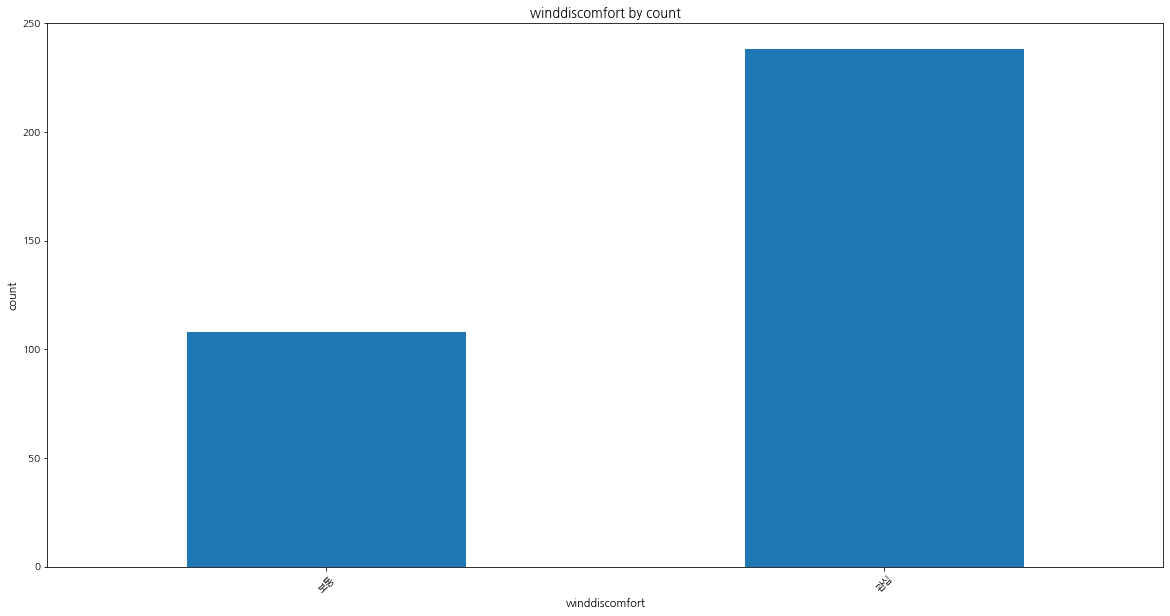

In [63]:
winddiscomfort_count = train.groupby('체감온도 평가').mean()['count'].sort_values()
winddiscomfort_count

plot_bar(winddiscomfort_count, 'winddiscomfort', 'count', 'winddiscomfort by count')

* 체감 온도가 높을 수록 수요가 많은 것을 파악 할 수 있다.